# <span style="color:#3306B0">Modeling human behavior: Is addiction predictable?</span>
[Loosely based on the [2019 M3 Challenge problem](https://m3challenge.siam.org/resources/archives/2019-year-at-a-glance/2019-problem-one-is-too-many-and-a-thousand-not-enough-substance-use-and-abuse/) and its [winning solutions](https://m3challenge.siam.org/resources/archives/2019-year-at-a-glance/2019-winning-solutions/)]

<P>&nbsp;</P>

<DIV ALIGN="CENTER">
    <IMG SRC="./brain_pic.jpg" width="50%"></IMG><BR></BR>
Image courtesy of <A HREF="https://www.sainsburywellcome.org/web/">Sainsbury Wellcome Centre</A>
</DIV>
<P>&nbsp;</P>

It is generally accepted that certain human behaviors and 
social traits might be predictable, at least by experienced 
psychologists and behavior specialists.  These experts are 
able to discern subtle patterns that relate a person's 
behavior to certain known or observable characteristics about that 
individual.  Given this fact, it is reasonable to consider 
developing models that mimic the thinking strategies of these 
human experts.

This lab is part of a series focusing on modeling one or more aspects 
of human behavior.  The particular problem we consider here is 
loosely based on the [2019 M3 challenge contest](https://m3challenge.siam.org/resources/archives/2019-year-at-a-glance/2019-problem-one-is-too-many-and-a-thousand-not-enough-substance-use-and-abuse/), which required 
participants to develop models related to the growing addiction to 
e-cigarettes in many parts of the world.  One of the exercises in 
the contest asked students to build a model to predict the 
susceptibility of an individual to e-cigarette addiction, given 
certain background characteristics of the individual such as age, 
sex, race, socioeconomic status, etc.

The question we will address in this lab is: How reliably can we 
model the risk of substance addiction behaviors in a person, given 
relevant demographic data about that individual?  In particular, we 
want a model that predicts the likelihood a given individual 
regularly: (a) consumes alcohol, and (b) uses marijuana.  Technically, 
we will approach this from a data-analytic perspective, and develop a model 
by looking for reproducible patterns in a representative dataset.

<div class="alert alert-block alert-warning">
<span style="color:#033600">
It is critically important to use high-quality, representative datasets
for developing models of this type, since the model's reliability as a 
predictive tool will strongly depend on it.  Finding such datasets for 
alcohol and drug use is easier for some countries and geographic 
locations than others.  Since the primary goal of this lab 
is to develop a valid modeling process for applications of this type, 
we will use a relatively simple dataset available through the
<A HREF="https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified" TARGET="_blank">UCI Machine Learning Repository</A>, where its 
details are described.  We note that this dataset serves as a 
good illustration of our modeling strategies, but is not necessarily 
representative of the underlying population of interest.
</span>
</div>

## <span style="color:#336630">Model development</span> 

We will follow the best practices guidelines of the M3 Challenge 
Contest, which recommends 
addressing each of the following components in the course of model 
development: clearly define the problem; state any assumptions 
made; identify the variables used;  construct the math model; 
analyze and assess the solutions.

### 1. Defining the problem

The goal of our problem may be stated as follows:

> We want to construct a model to predict the likelihood a given individual regularly: (a) consumes alcohol, and (b) uses marijuana. The model's prediction will be based on receiving certain demographic information about the individual, such as age, sex, race, etc.

We note that in machine learning jargon this is known as a 
**classification problem**, since its output consists of distinct 
categories into which all the input sets are classified.

### 2. Strategy and assumptions

As discussed above, we will use a data-analytic approach and develop 
the model by fitting it to a dataset on alcohol and marijuana use 
in a representative sample of individuals.  We will develop a 
separate model for each drug (alcohol and marijuana), although the 
strategy used will be similar.  Since we are interested in 
predicting whether or not an individual uses these items, the output 
(or, response variable) will be binary.  The independent or predictor 
variables consist of the demographic inputs we want to include in the 
model.

A function of the following form will be used as the model

$$
\begin{equation}
  \hat{y} = \frac{1}{1+e^{-(b_0 + b_1 x_1 + b_2 x_2 + \ldots + b_n x_n)}}
\end{equation}
$$

Here $\hat{y}$ is the predicted response, $x_1, x_2, \ldots, x_n$ 
are the predictor variables, and $b_0, b_1, \ldots, b_n$ are 
constant model parameters that must be determined by fitting the model 
to a suitable dataset.  Notice that the $x_i$'s are assumed to 
be numerical variables here, which means our categorical predictors 
must be transformed to numerical values in some appropriate way.  The 
response $\hat{y}$ is a continuous 
variable in the range $(0,1)$.  Thus, its numerical value is 
interpreted as a probability on the binary response.  For example, 
in the alcohol model, $\hat{y}$ is the probability that the selected 
individual consumes alcohol.

This model, together with the process of fitting it to an underlying 
dataset is known as **logistic regression**.  It is a widely used 
technique for binary classification problems due to its simplicity, 
interpretability and efficiency.  In practice, the model is 
algebraically rearranged and written as 
$$
\begin{eqnarray*}
   \frac{\hat{y}}{1-\hat{y}} &  = & 
   e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots + b_n x_n} \\[6pt]
   ~  \Rightarrow ~ 
      \ln\left[ \frac{\hat{y}}{1-\hat{y}}\right] & = & 
      b_0 + b_1 x_1 + b_2 x_2 + \ldots + b_n x_n
\end{eqnarray*}
$$

If we define the logit as $\hat{z}=\ln[\hat{y}/(1-\hat{y})]$, this 
last equation is a straight line relationship between $\hat{z}$ and 
the predictors.  The ratio $\frac{\hat{y}}{1-\hat{y}}$ represents 
**the odds** of the event whose probability is $\hat{y}$, and 
$\hat{z}$ represents the **log odds**.

Logistic regression works best when the following assumptions are 
satisfied
1. The dataset consists of independent observations.
2. There is an approximately linear relationship between $\hat{z}$ and each predictor variable.
3. There is no multicollinearity among the predictors.


 ### 3. The model and its variables

We begin by taking a closer look at our dataset, which is extracted 
from a much larger set available through the
<A HREF="https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified" TARGET="_blank">UCI Machine Learning Repository</A>.  The code 
below reads the dataset from a local file named `drug_consumption_unmod.csv` and displays the first few lines:

In [1]:
import pandas as pd
df = pd.read_csv('./drug_consumption_unmod.csv')
print(df.head(8))

   Number    Age  Gender  Education Country Ethnicity Alcohol Cannabis
0       1  35-44  female  prof cert    U.K.     Mixed     CL5      CL0
1       2  25-34    male        PhD    U.K.     White     CL5      CL4
2       3  35-44    male  prof cert    U.K.     White     CL6      CL3
3       4   0-24  female   master's    U.K.     White     CL4      CL2
4       5  35-44  female        PhD    U.K.     White     CL4      CL3
5       6    65+  female         hs  Canada     White     CL2      CL0
6       7  45-54    male   master's  U.S.A.     White     CL6      CL1
7       8  35-44    male         hs    U.K.     White     CL5      CL0


<BR>&nbsp;</BR>
Suppose we want to use the 5 predictors `Age`, `Gender`, `Education`, 
`Country`, `Ethnicity` to model the response, which is the probability of 
alcohol consumption (or of cannabis use).  As a first step in that 
direction, we need to pre-process the data and transform the categorical 
variables into a numerical form.  There are a few different ways for 
doing this, and the authors of the dataset have themselves provided 
a transformed dataset based on a strategy discussed in detail in their 
<A HREF="https://arxiv.org/pdf/1506.06297" TARGET="_blank">journal 
publication</A>.  The technical details of their strategy involve polychoric correlations and principal component analysis, which are beyond the scope of our present work.  We will simply use their transformed values for all 5 of our 
predictors.

For the response variable (`Alcohol` or `Cannabis`), there are 7 categories: 
- CL0 = never used
- CL1 = used over a decade ago
- CL2 = used in the last decade
- CL3 = used in the last year
- CL4 = used in the last month
- CL5 = used in the last week
- CL6 = used in the last day

Since the goal of our model is to predict the likelihood of 
**regular** consumption (of alcohol or marijuana), we will 
define anyone who has not used it within the last month to be a 
non-user.  Accordingly, CL0, CL1, CL2 and CL3 will be assigned the 
value 0, and the remaining categories will be assigned 1.

In the next code segment we read the transformed predictor variables 
from a local file named `drug_consumption_mod.csv` and convert the 
response variables to binary form:

In [4]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('drug_consumption_mod.csv')

# Define a mapping function to convert qualitative responses to binary (0 or 1)
def convert_to_binary(value):
    if value in ['CL0', 'CL1', 'CL2', 'CL3']:
        return 0
    else:
        return 1

# Apply the mapping to the 'Alcohol' and 'Cannabis' columns
df['Alcohol'] = df['Alcohol'].apply(convert_to_binary)
df['Cannabis'] = df['Cannabis'].apply(convert_to_binary)

# Display the first few lines of data
print(df.head(8))

   Number      Age   Gender  Education  Country  Ethnicity  Alcohol  Cannabis
0       1  0.49788  0.48246   -0.05921  0.96082    0.12600        1         0
1       2 -0.07854 -0.48246    1.98437  0.96082   -0.31685        1         1
2       3  0.49788 -0.48246   -0.05921  0.96082   -0.31685        1         0
3       4 -0.95197  0.48246    1.16365  0.96082   -0.31685        1         0
4       5  0.49788  0.48246    1.98437  0.96082   -0.31685        1         0
5       6  2.59171  0.48246   -1.22751  0.24923   -0.31685        0         0
6       7  1.09449 -0.48246    1.16365 -0.57009   -0.31685        1         0
7       8  0.49788 -0.48246   -1.73790  0.96082   -0.31685        1         0


<BR>&nbsp;</BR>
#### <span style="color:#633630">Model for alcohol</span>

Let $\hat{y}$ denote the probability an individual regularly 
consumes alcohol.  The logistic regression model for predicting 
$\hat{y}$ can be written as
$$
\begin{equation}
  \hat{z} = 
      b_0 + b_A x_A + b_G x_G + b_E x_E + b_C x_C + b_R x_R
\end{equation}
$$
where $\hat{z} = \ln[\hat{y}/(1-\hat{y})]$, and the predictors 
$x_i$ are identified by the following subscripts: 
$A= \mbox{Age}$, $~G=\mbox{Gender}$, $~E=\mbox{Education}$, 
$~C=\mbox{Country}$, $~R=\mbox{Ethnicity}$.  The coefficients $b_i$ 
are found by fitting the model to the dataset, which contains 
information about $1885$ individuals.  For fitting and testing the 
model, we employ a strategy commonly used in supervised machine 
learning algorithms. Here is how it works:
- The dataset is randomized and split into two (approximately) equal subsets.
- One subset is used for fitting the model and finding the optimal coefficient values.
- The other subset is used to test the fitted model's prediction accuracy.

By default, the computed probability $\hat{y}$ is converted to 
a binary `yes` or `no` response based on a threshold value of $0.5$. In 
other words, if $\hat{y}\ge 0.5$ then the prediction is that the 
individual regularly consumes alcohol, and otherwise not.

This strategy is implemented in the Python code below, which was largely 
generated by <A HREF="https://chat.openai.com" target="_blank">ChatGPT</A>. It uses the `sklearn` library, because it contains 
built-in functions for many common tasks that arise in machine learning, 
and is widely used for that reason.  The end result is a short, simple, 
easy to read code, in which the steps and logic are largely 
transparent. We note, however, that there are a significant 
number of mathematical and algorithmic details involved in doing 
logistic regression, which are not visible in this code. These details 
are hidden inside the `LogisticRegression()` 
function in the `sklearn` library.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Select the predictors (X) and the response variable (y)
X = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity']]
y = df['Alcohol']

# Split the data into a 50% training set and a 50% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)

# Extract the model's coefficients and print them
b0 = model.intercept_[0]
c = model.coef_
bA=c[0][0]; bG=c[0][1]; bE=c[0][2]; bC=c[0][3]; bR=c[0][4]
print(f"The model coefficients are: \nb_0 = {b0:.4f}, b_A = {bA:.4f}, \
b_G = {bG:.4f}, \nb_E = {bE:.4f}, b_C = {bC:.4f}, b_R = {bR:.4f}")

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance stats
print(f"\nModel Accuracy = {accuracy:.2f}  \
(i.e., correct predictions/total predictions)")
print("\nConfusion Matrix for the prediction accuracy:")
print(conf_matrix)
print("\nInterpretation of confusion matrix:")
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]
print(f"true neg = {tn}, false neg = {fn}, false pos = {fp}, true pos = {tp}")


The model coefficients are: 
b_0 = 1.6806, b_A = -0.4853, b_G = 0.0606, 
b_E = 0.4010, b_C = 0.5002, b_R = 0.3070

Model Accuracy = 0.81  (i.e., correct predictions/total predictions)

Confusion Matrix for the prediction accuracy:
[[  2 178]
 [  4 759]]

Interpretation of confusion matrix:
true neg = 2, false neg = 4, false pos = 178, true pos = 759


### <span style="color:#336630">4. Results and model assessment</span>

These results suggest the model's overall performance is satisfactory, 
at least in terms of fitting the underlying dataset. The proportion 
of correct predictions on the testing dataset is $0.81$, which is not 
spectacular, but it is still sufficiently good. However, taking a look 
at the details reveals a very different picture.

We first 
note that the model does very well in correctly classifying individuals 
who are regular alcohol users. As seen in the confusion matrix, there 
were only $4$ false negatives -- i.e., alcohol users who were incorrectly 
classified as non-users. Thus, out of $763$ true alcohol users, the 
model correcly identified $759$.

In striking contrast, the model does very poorly with correcly 
classifying non-users. The confusion matrix indicates that only $2$ 
non-users in the test set were correctly identified, while the 
remaining $178$ were incorrectly 
classified as alcohol users. This is, clearly, an unacceptably high 
rate of false positives.

Part of the problem here is that we have highly imbalanced data, 
with many more positive cases than negatives. As seen in the 
confusion matrix, there are $763$ alcohol users and only $180$ 
non-users. Thus the model's prediction accuracy appears misleadingly high, 
since it does well with correctly identifying alcohol users. There exist 
more specialized techniques for resampling such datasets to make 
adjustments for the imbalance. However, those are beyond the scope 
of our current work.  We will close by checking how well our dataset 
satisfies the assumptions of logistic regression:

1. **Independent observations**: The UCI Machine Learning Repository from where we obtained the data indicates the authors compiled it using a voluntary-response online survey. It is unlikely the resulting dataset is independent or representative.
2. **Linear relationship between logit and each predictor**: The code below plots the computed logit versus each predictor.
3. **No multicollinearity among the predictors**: We check this by computing the Pearson correlation between each pair of predictors (see below).

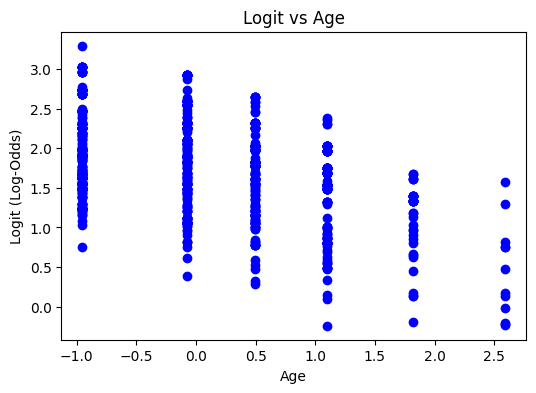

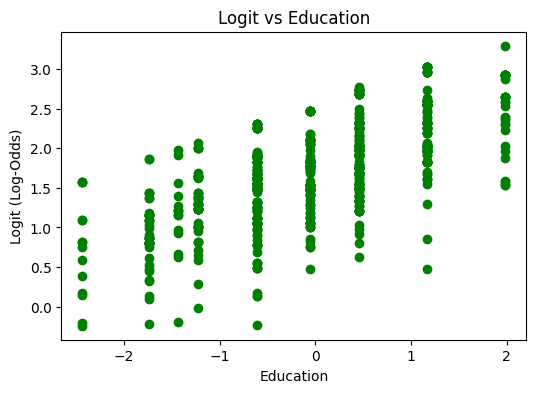

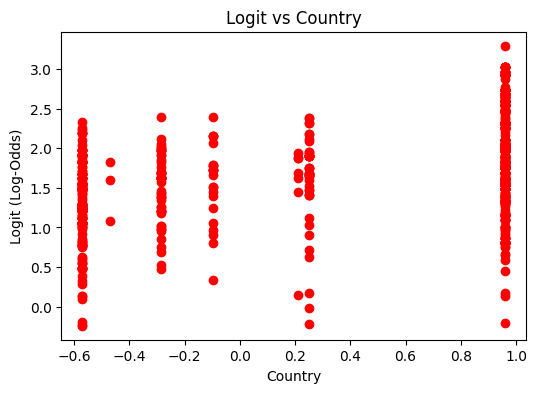

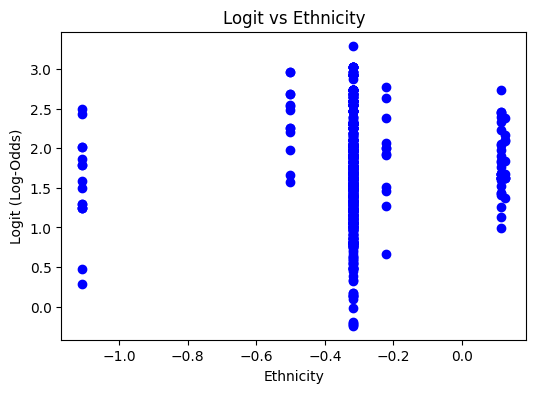

In [39]:
# Code to plot logit versus each predictor

import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute the logit (log-odds)
logit_y = np.log(y_prob / (1 - y_prob))

# Plot logit vs Age
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Age'], logit_y, color='blue')
plt.xlabel('Age')
plt.ylabel('Logit (Log-Odds)')
plt.title('Logit vs Age')
plt.show()

# Plot logit vs Education
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Education'], logit_y, color='green')
plt.xlabel('Education')
plt.ylabel('Logit (Log-Odds)')
plt.title('Logit vs Education')
plt.show()

# Plot logit vs Country
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Country'], logit_y, color='red')
plt.xlabel('Country')
plt.ylabel('Logit (Log-Odds)')
plt.title('Logit vs Country')
plt.show()

# Plot logit vs Ethnicity
plt.figure(figsize=(6, 4))
plt.scatter(X_test['Ethnicity'], logit_y, color='blue')
plt.xlabel('Ethnicity')
plt.ylabel('Logit (Log-Odds)')
plt.title('Logit vs Ethnicity')
plt.show()

In [40]:
# Compute Pearson correlation for each pair of predictors
df_select = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity']]
correlation_matrix = df_select.corr()
print(correlation_matrix)

                Age    Gender  Education   Country  Ethnicity
Age        1.000000  0.110286   0.158811  0.354241  -0.069753
Gender     0.110286  1.000000   0.196774  0.216271  -0.001213
Education  0.158811  0.196774   1.000000  0.225311  -0.036099
Country    0.354241  0.216271   0.225311  1.000000  -0.127946
Ethnicity -0.069753 -0.001213  -0.036099 -0.127946   1.000000


<BR>&nbsp;</BR>
#### Interpreting the diiagnostic outputs

Inspecting the plots, we see that `Age` and `Education` exhibit 
a clear linear relationship with the logit. Likewise, 
`Gender` is a strictly binary variable, and is considered to always 
be linearly related. The graph of `Country` vs the logit, although less 
perfect, would still be considered close enough to linear. The only 
variable that might be considered questionable is `Ethnicity`, as its 
graph exhibits a bit of a curvy pattern.

Moving on to the matrix of pairwise correlations, we observe that no 
predictor is strongly correlated with any of the others. The 
magnitude of the strongest correlation is about $0.35$ (between 
`Age` and `Country`). This suggests 
there is no multicollinearity among our predictors, which is good 
news!

To summarize, it appears that the primary shortcoming of our dataset 
from the standpoint of the assumptions is that it violates 
the independent observations requirement. Thus the resulting model 
is, likely, not reliable for use in the general population.

## <span style="color:#336630">Practice exercise</span> 

Construct and assess a logistic logistic regression model for 
predicting cannabis use based on the same dataset and the same 
predictor variables. Be sure to discuss the accuracy and reliability 
of your model, supported by relevant graphs and diagnostic metrics.